In [63]:
## 导入所需的包

import numpy as np  # 便于计算
import pandas as pd  # 便于对数据进行处理
from datetime import datetime
from scipy .stats import norm,skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC, ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler,OneHotEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin,clone
import xgboost as xgb
import os

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from scipy.stats import norm 
from scipy import stats

from scipy.special import boxcox1p

import warnings
warnings.filterwarnings("ignore")

In [64]:
# 数据导入
train = pd.read_csv(r'train.csv')
test = pd.read_csv(r'test.csv')
merge = pd.concat((train,test),axis = 0,ignore_index = True)   #axis=0表示合并连接的轴为行

In [65]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [66]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [67]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

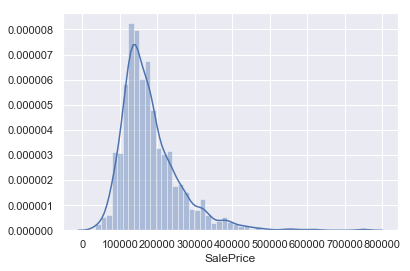

In [68]:
sns.distplot(train['SalePrice']);

In [69]:
print("偏度值：%f" % train['SalePrice'].skew())

偏度值：1.882876


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


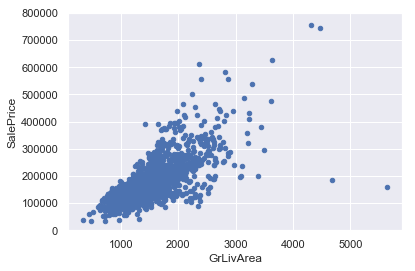

In [70]:
# 连续型属性
var = 'GrLivArea'
data = pd.concat([train['SalePrice'],train[var]],axis = 1)
data.plot.scatter(x = var,y = 'SalePrice',ylim = (0,800000))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


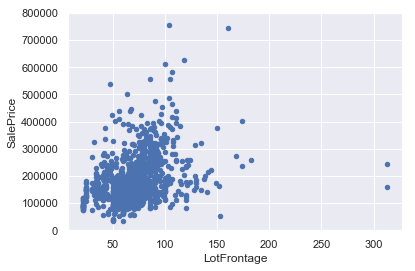

In [71]:
var = 'LotFrontage'
data = pd.concat([train['SalePrice'],train[var]],axis = 1)
data.plot.scatter(x = var,y = 'SalePrice',ylim = (0,800000))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


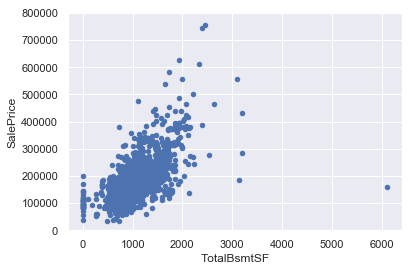

In [72]:
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'],train[var]],axis = 1)
data.plot.scatter(x = var,y = 'SalePrice',ylim = (0,800000))

In [73]:
# 去掉离群点
# 居住面积大于4000平方英尺而房屋售价小于300000的数据显然有问题
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
# 街道长度大于300英尺的数据显然有问题
train = train.drop(train[train['LotFrontage'] > 300].index)
# 地下面积的总面积大于5000平方英尺的数据显然有问题
train = train.drop(train[train['TotalBsmtSF'] > 5000].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


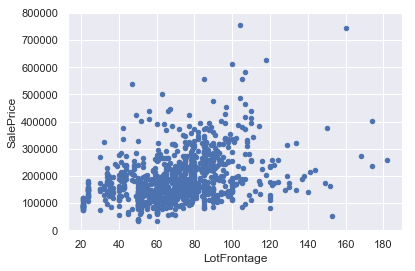

In [74]:
var = 'LotFrontage'
data = pd.concat([train['SalePrice'],train[var]],axis = 1)
data.plot.scatter(x = var,y = 'SalePrice',ylim = (0,800000))

(-0.5, 9.5, 0, 800000)

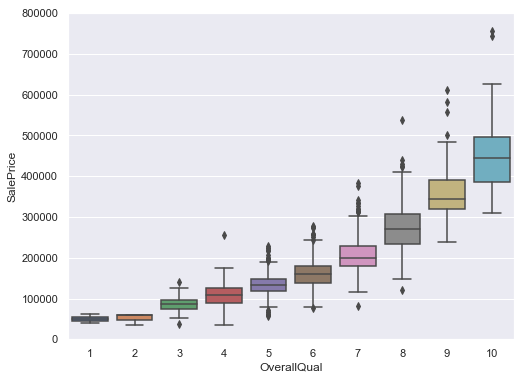

In [75]:
# 离散型属性
var = 'OverallQual'
data = pd.concat([train['SalePrice'],train[var]],axis = 1)
f,ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x = var,y = 'SalePrice',data = data)
fig.axis(ymin = 0,ymax = 800000)

(-0.5, 24.5, 0, 800000)

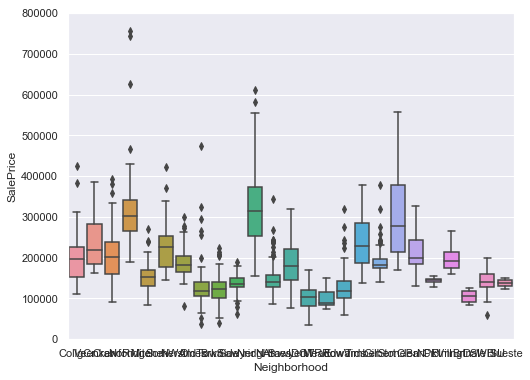

In [76]:
var = 'Neighborhood'
data = pd.concat([train['SalePrice'],train[var]],axis = 1)
f,ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x = var,y = 'SalePrice',data = data)
fig.axis(ymin = 0,ymax = 800000)

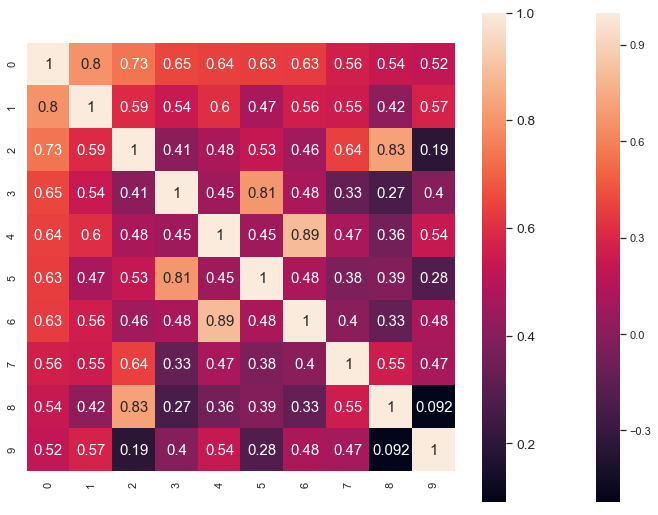

In [77]:
# 热力图 相关系数图
corrmat = train.corr()
f,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat,square = True);
cols = corrmat.nlargest(10,'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale = 1.25)
sns.heatmap(cm,cbar = True,annot = True,square = True)

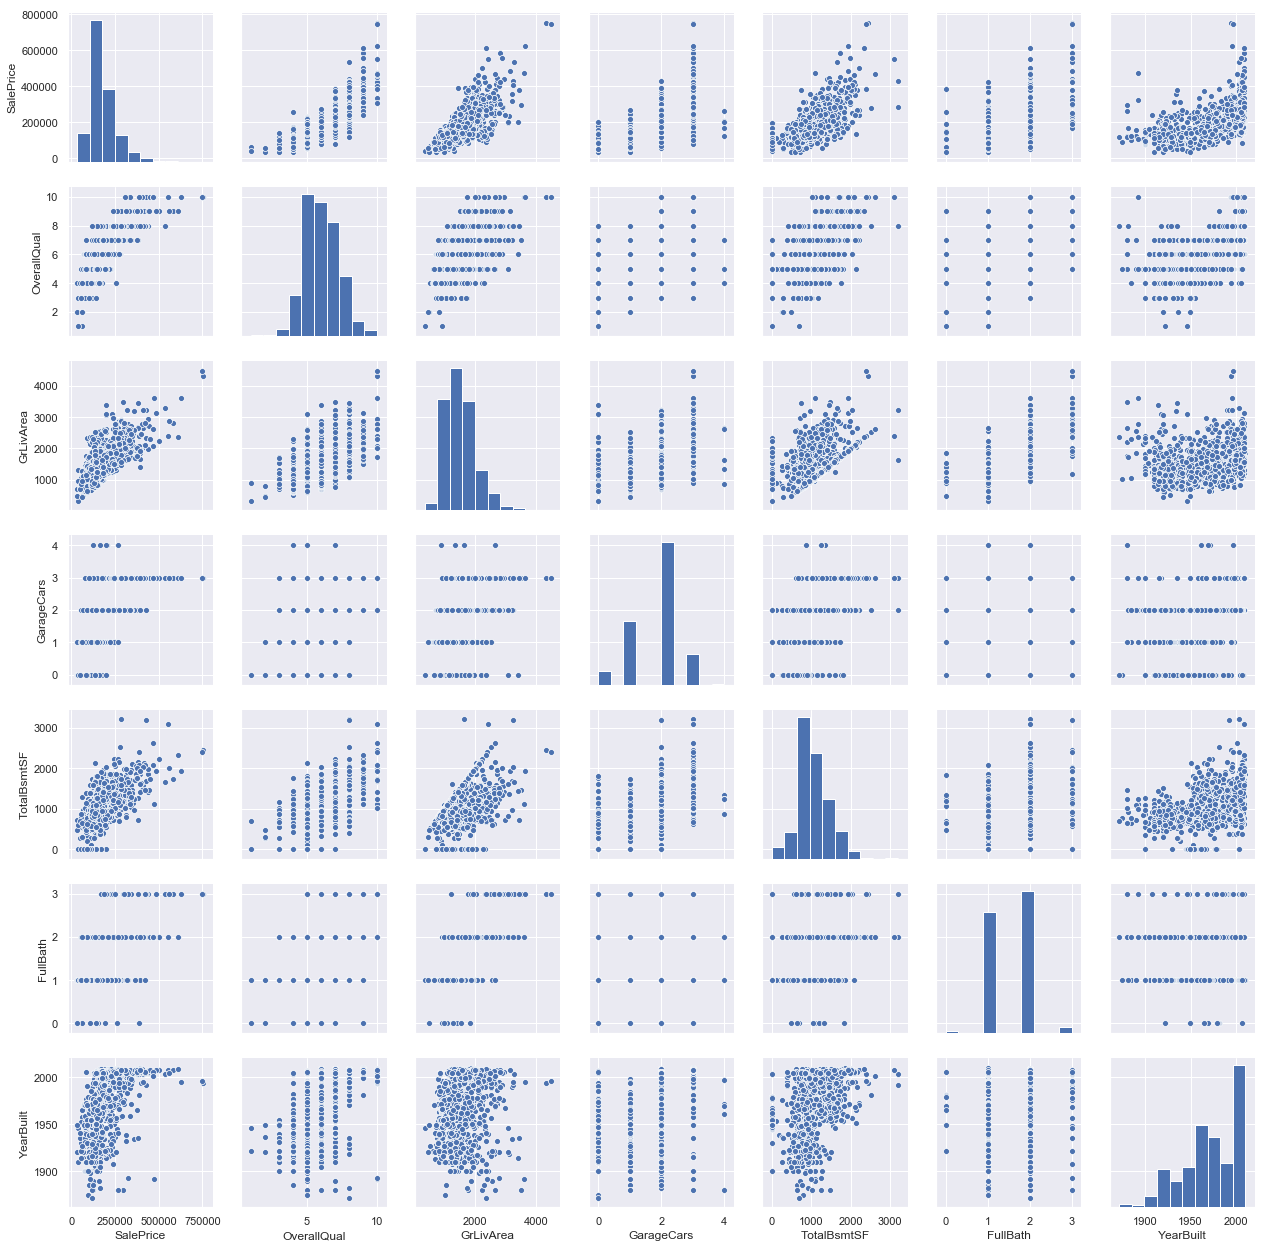

In [78]:
sns.set()
cols = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(train[cols],size = 2.5)
plt.show()

In [79]:
# missing data
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent],axis = 1,keys = ['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1451,0.995882
MiscFeature,1403,0.962938
Alley,1366,0.937543
Fence,1176,0.807138
FireplaceQu,690,0.473576
LotFrontage,259,0.177763
GarageCond,81,0.055594
GarageType,81,0.055594
GarageYrBlt,81,0.055594
GarageFinish,81,0.055594


In [80]:
# 数据处理
train_ID = train['Id']
test_ID = test['Id']

train.drop('Id',axis = 1,inplace = True)
test.drop('Id',axis = 1,inplace = True)

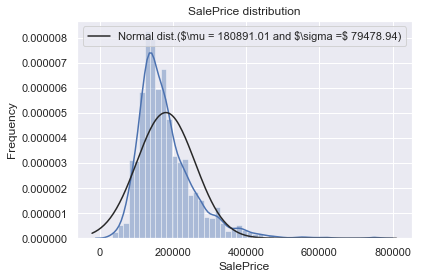

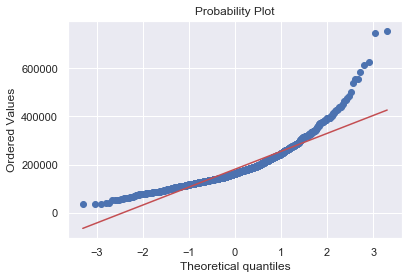

In [81]:
# 分布图
sns.distplot(train['SalePrice'],fit = norm);

(mu,sigma) = norm.fit(train['SalePrice'])
plt.legend(['Normal dist.($\mu = {:.2f} and $\sigma =$ {:.2f})'.format(mu,sigma)],
          loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# QQ图
fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot = plt)
plt.show()

In [82]:
# 进行对数变换log(1+x)
train['SalePrice'] = np.log(train['SalePrice']+1)

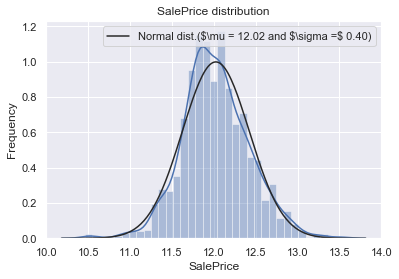

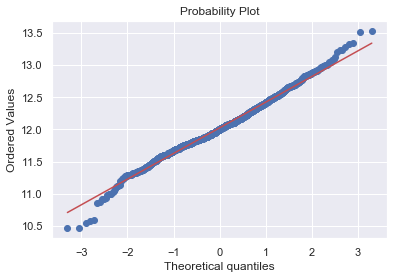

In [83]:
# 进行变换后的分布图以及QQ图
sns.distplot(train['SalePrice'],fit = norm);

(mu,sigma) = norm.fit(train['SalePrice'])
plt.legend(['Normal dist.($\mu = {:.2f} and $\sigma =$ {:.2f})'.format(mu,sigma)],
          loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# QQ图
fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot = plt)
plt.show()

In [84]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train,test)).reset_index(drop = True)
all_data.drop(['SalePrice'],axis = 1,inplace = True)

In [85]:
# 缺失值处理
# 游泳池
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')

In [86]:
# 缺失值处理
# 特征
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')

In [87]:
# 通道
all_data['Alley'] = all_data['Alley'].fillna('None')

In [88]:
# 栅栏
all_data['Fence'] = all_data['Fence'].fillna('None')

In [89]:
# 壁炉
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')

In [90]:
# 到街道的距离
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [91]:
# 关于车库的
for col in ('GarageType','GarageFinish','GarageQual','GarageCond'):
    all_data[col] = all_data[col].fillna('None')

for col in ('GarageYrBlt','GarageArea','GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [92]:
# 关于地下室的
for col in ('BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [93]:
# 砌体
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)

In [94]:
# 分区属性
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [95]:
# 家庭功能评价
all_data['Functional'] = all_data['Functional'].fillna('Typ')

In [96]:
# 电力系统
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [97]:
# 厨房品质
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [98]:
# 外部
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [99]:
# 销售类型
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [100]:
# 建筑类型
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [101]:
all_data = all_data.drop(["PoolQC" , "MiscFeature", "Alley"],axis = 1)
all_data = all_data.drop(['Utilities'],axis = 1)
all_data = all_data.drop(['Street'],axis = 1)

all_data_na = (all_data.isnull().sum()/len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({'Missing Ratio':all_data_na})
missing_data.head()

,Missing Ratio


In [102]:
# 看似为连续值的数据离散化
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

all_data['OverallCond'] = all_data['OverallCond'].astype(str)

all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [104]:
# 将分类变量分成1，2，3...等数值
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu','BsmtQual','BsmtCond','GarageQual','GarageCond',
       'ExterQual','ExterCond','HeatingQC','KitchenQual','BsmtFinType1',
       'BsmtFinType2','Functional','Fence','BsmtExposure','GarageFinish','LandSlope',
       'LotShape','PavedDrive','CentralAir','MSSubClass','OverallCond',
       'YrSold','MoSold')

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(all_data[c].values)
    
print('Shape all_data:{}'.format(all_data.shape))

Shape all_data:(2916, 74)


In [105]:
# 增加新特征
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['YrBltAndRemod'] = all_data['YearBuilt'] + all_data['YearRemodAdd']
all_data['Total_sqr_footage'] = (all_data['BsmtFinSF1'] + all_data['BsmtFinSF2'] +
                                 all_data['1stFlrSF'] + all_data['2ndFlrSF'])

all_data['Total_Bathrooms'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) +
                               all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))

all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] +
                              all_data['EnclosedPorch'] + all_data['ScreenPorch'] +
                              all_data['WoodDeckSF'])

In [106]:
# 特征的偏度
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index

skewed_feats = all_data[numeric_feats].apply(lambda x:skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame({'skew':skewed_feats})
skewness.head()


,skew
MiscVal,21.935910
PoolArea,17.685603
LotArea,13.139681
LowQualFinSF,12.082427
3SsnPorch,11.370087


In [107]:
skewness = skewness[abs(skewness) > 0.75]
print('{} transform'.format(skewness.shape[0]))

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat],lam)

60 transform


In [108]:
all_data = pd.get_dummies(all_data)

In [109]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [110]:
## 机器学习
# 设置k折交叉验证的参数
n_folds = 5
# 创建模型评分函数，根据不同模型的表现打分
# rmsle表示均方根对数误差（Root Mean Squared Logarithmic Error）
# cv表示交叉验证（Cross-validation）
def rmsle_cv(model):
    kf = KFold(n_folds,shuffle = True,random_state = 42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,train.values,y_train,scoring = 'neg_mean_squared_error',cv = kf))
    return rmse

In [111]:
# 定义lasso模型（使用一范数作为正则化项）
lasso = make_pipeline(RobustScaler(),Lasso(alpha = 0.0005,random_state = 1))

In [112]:
# 定义elastic net弹性网络模型（弹性网络实际上是结合了岭回归和lasso的特点，同时使用了L1和L2作为正则化项）
ENe = make_pipeline(RobustScaler(),ElasticNet(alpha = 0.0005,l1_ratio = .9,random_state = 3))

In [113]:
# 带核函数的岭回归
KRR = KernelRidge(alpha = 0.6,kernel = 'polynomial',degree = 2,coef0 = 2.5)

In [114]:
# Gradient boosting 
GBoost = GradientBoostingRegressor(n_estimators = 3000,learning_rate = 0.05,
                                  max_depth = 4,max_features = 'sqrt',
                                  min_samples_leaf = 15,min_samples_split = 10,
                                  loss = 'huber',random_state = 5)

In [115]:
# xgboost
xgboost = xgb.XGBRegressor(colsample_bytree = 0.4603,gamma = 0.0468,
                            learning_rate = 0.05,max_depth = 3,
                            min_child_weight = 1.7817,n_estimators = 2200,
                            reg_alpha = 0.4640,reg_lambda = 0.8571,
                            subsample = 0.5213,silent = 1,
                            nthread = -1)

In [116]:
# 打印一范数LASSO模型的得分
score = rmsle_cv(lasso)
print('\nLasso Score:{:.4f}({:.4f})\n'.format(score.mean(),score.std()))


Lasso Score:0.1115(0.0074)



In [117]:
# 打印elastic net弹性网络模型的得分
score = rmsle_cv(ENe)
print('\nElasticNet Score:{:.4f}({:.4f})\n'.format(score.mean(),score.std()))


ElasticNet Score:0.1115(0.0074)



In [118]:
# 打印Kernel Ridge回归模型的得分
score = rmsle_cv(KRR)
print('\nKernel Ridge Score:{:.4f}({:.4f})\n'.format(score.mean(),score.std()))


Kernel Ridge Score:0.1150(0.0079)



In [119]:
# 打印gbr梯度提升回归模型的得分
score = rmsle_cv(GBoost)
print('\nGradient Boosting Score:{:.4f}({:.4f})\n'.format(score.mean(),score.std()))


Gradient Boosting Score:0.1154(0.0074)



In [120]:
# 打印xgboost模型的得分
score = rmsle_cv(xgboost)
print('\nXgBoost Score:{:.4f}({:.4f})\n'.format(score.mean(),score.std()))


XgBoost Score:0.1154(0.0063)



In [121]:
# 集成学习——多模型取平均
class averagemodels (BaseEstimator,RegressorMixin,TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        
        for model in self.models_:
            model.fit(X,y)
                
        return self
        
    def predict(self, X):
        predictions = np.column_stack([
         model.predict(X) for model in self.models_
        ])
        return np.mean(predictions,axis = 1)

In [122]:
# 对五个模型做集成
averaged_models_five = averagemodels(models = (lasso,ENe,KRR,xgboost,GBoost))

score = rmsle_cv(averaged_models_five)
print('\nAverage base models Score:{:.4f}({:.4f})\n'.format(score.mean(),score.std()))


Average base models Score:0.1080(0.0072)



In [123]:
# 选择得分最低的四个模型做集成
averaged_models = averagemodels(models = (lasso,ENe,KRR,xgboost))

score = rmsle_cv(averaged_models)
print('\nAverage base models Score:{:.4f}({:.4f})\n'.format(score.mean(),score.std()))


Average base models Score:0.1091(0.0072)



In [124]:
# 选择得分由小到大排名为1,2,3,5的模型做集成
averaged_models = averagemodels(models = (lasso,ENe,KRR,GBoost))

score = rmsle_cv(averaged_models)
print('\nAverage base models Score:{:.4f}({:.4f})\n'.format(score.mean(),score.std()))


Average base models Score:0.1084(0.0075)



In [125]:
# 选择得分由小到大排名为1,2,4,5的模型做集成
averaged_models = averagemodels(models = (lasso,ENe,xgboost,GBoost))

score = rmsle_cv(averaged_models)
print('\nAverage base models Score:{:.4f}({:.4f})\n'.format(score.mean(),score.std()))

KeyboardInterrupt: 

In [ ]:
# 选择得分由小到大排名为1,3,4,5的模型做集成
averaged_models = averagemodels(models = (lasso,KRR,xgboost,GBoost))

score = rmsle_cv(averaged_models)
print('\nAverage base models Score:{:.4f}({:.4f})\n'.format(score.mean(),score.std()))

In [ ]:
# 选择得分由小到大排名为2,3,4,5的模型做集成
averaged_models = averagemodels(models = (ENe,KRR,xgboost,GBoost))

score = rmsle_cv(averaged_models)
print('\nAverage base models Score:{:.4f}({:.4f})\n'.format(score.mean(),score.std()))

In [126]:
# 进行预测
averaged_models_five.fit(train.values,y_train)
y_pre_averaged = averaged_models_five.predict(test.values)
y_pre_averaged = np.exp(y_pre_averaged)-1
y_pre_averaged

array([120257.03550225, 164423.43972553, 185640.36556479, ...,
       166838.3764782 , 113629.86605199, 222475.35433598])

In [127]:
# 输出数据
prediction_averaged = pd.DataFrame(y_pre_averaged, columns = ['SalePrice'])
result_averaged = pd.concat([test_ID, prediction_averaged], axis=1)
result_averaged.columns

Index(['Id', 'SalePrice'], dtype='object')

In [128]:
# 保存预测结果
result_averaged.to_csv('./Predictions_averaged.csv', index=False)

In [129]:
# 集成学习——堆积模型
class stackingmodels(BaseEstimator,RegressorMixin,TransformerMixin):
    def __init__(self,base_models,meta_model,n_folds = 5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
        
    def fit(self,X,y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits = self.n_folds,shuffle = True,random_state = 156)
        out_of_fold_predictions = np.zeros((X.shape[0],len(self.base_models))) # 交叉验证
        for i,model in enumerate(self.base_models):
            for train_index,holdout_index in kfold.split(X,y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index],y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index,i] = y_pred
                
        self.meta_model_.fit(out_of_fold_predictions,y)
        return self
    
    def predict(self,X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis = 1) # 第一阶段
            for base_models in self.base_models_ # 第二阶段
        ])
        return self.meta_model_.predict(meta_features)
    

In [139]:
stacked_models = stackingmodels(base_models = (ENe,GBoost,KRR),
                               meta_model = lasso)

score = rmsle_cv(stacked_models)
print('\nStacking models Score:{:.4f}({:.4f})\n'.format(score.mean(),score.std()))


Stacking models Score:0.1080(0.0076)



In [140]:
# 进行预测
stacked_models.fit(train.values,y_train)
y_pre_stacked = stacked_models.predict(test.values)
y_pre_stacked = np.exp(y_pre_stacked)-1
y_pre_stacked

array([118985.47034123, 162993.03432431, 186455.15326174, ...,
       169360.54371714, 114385.13390558, 220805.21185474])

In [141]:
# 输出数据
prediction_stacked = pd.DataFrame(y_pre_stacked, columns=['SalePrice'])
result_stacked = pd.concat([test_ID, prediction_stacked], axis=1)
result_stacked.columns

Index(['Id', 'SalePrice'], dtype='object')

In [142]:
# 保存预测结果
result_stacked.to_csv('./Predictions_stacked.csv', index=False)

In [143]:
# 对平均模型以及堆积模型再做平均
averaged_models_new = averagemodels(models = (averaged_models_five,stacked_models))

score = rmsle_cv(averaged_models_new)
print('\nStack&Average models Score:{:.4f}({:.4f})\n'.format(score.mean(),score.std()))


Stack&Average models Score:0.1078(0.0074)



In [136]:
# 进行预测
averaged_models_new.fit(train.values,y_train)
y_pre_averaged_new = averaged_models_new.predict(test.values)
y_pre_averaged_new = np.exp(y_pre_averaged_new)-1
y_pre_averaged_new

array([119619.56334336, 163706.674751  , 186047.31337443, ...,
       168094.72972909, 114006.87455273, 221638.70995329])

In [137]:
# 输出数据
prediction_averaged_new = pd.DataFrame(y_pre_averaged_new, columns=['SalePrice'])
result_averaged_new = pd.concat([test_ID, prediction_averaged_new], axis=1)
result_averaged_new.columns

Index(['Id', 'SalePrice'], dtype='object')

In [138]:
# 保存预测结果
result_averaged_new.to_csv('./Predictions.csv', index=False)